These are systems with a contact Hamiltonian of the form
$$
H = ps + f(q)s + F(q, t)
$$

We will focus in particular on the Van der Pol oscillator
where $f(q) = - \epsilon (1-q^2)$ and $F(q) = q - \phi(t)$.

In [2]:
from integrators import contact as ic
from integrators.common import rk4
from lienard import integrator as li
from lienard import models as lm

def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

Lienard = lm.Lienard
VanDerPol = lm.VanDerPol

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['legend.fontsize'] = 16 
plt.rcParams['mathtext.fontset'] = "cm"
plt.rcParams["savefig.bbox"] = 'tight'

In [4]:
def err(x, y):
    return np.maximum.accumulate(np.abs(x-y))

## Orbits $\epsilon = 0$

/Users/mseri/code/VanDerPolContact/lienard/models.py:27: RuntimeWarning: overflow encountered in double_scalars
  return -epsilon*(1 - q**2)
/Users/mseri/code/VanDerPolContact/lienard/models.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return -epsilon*(1 - q**2)


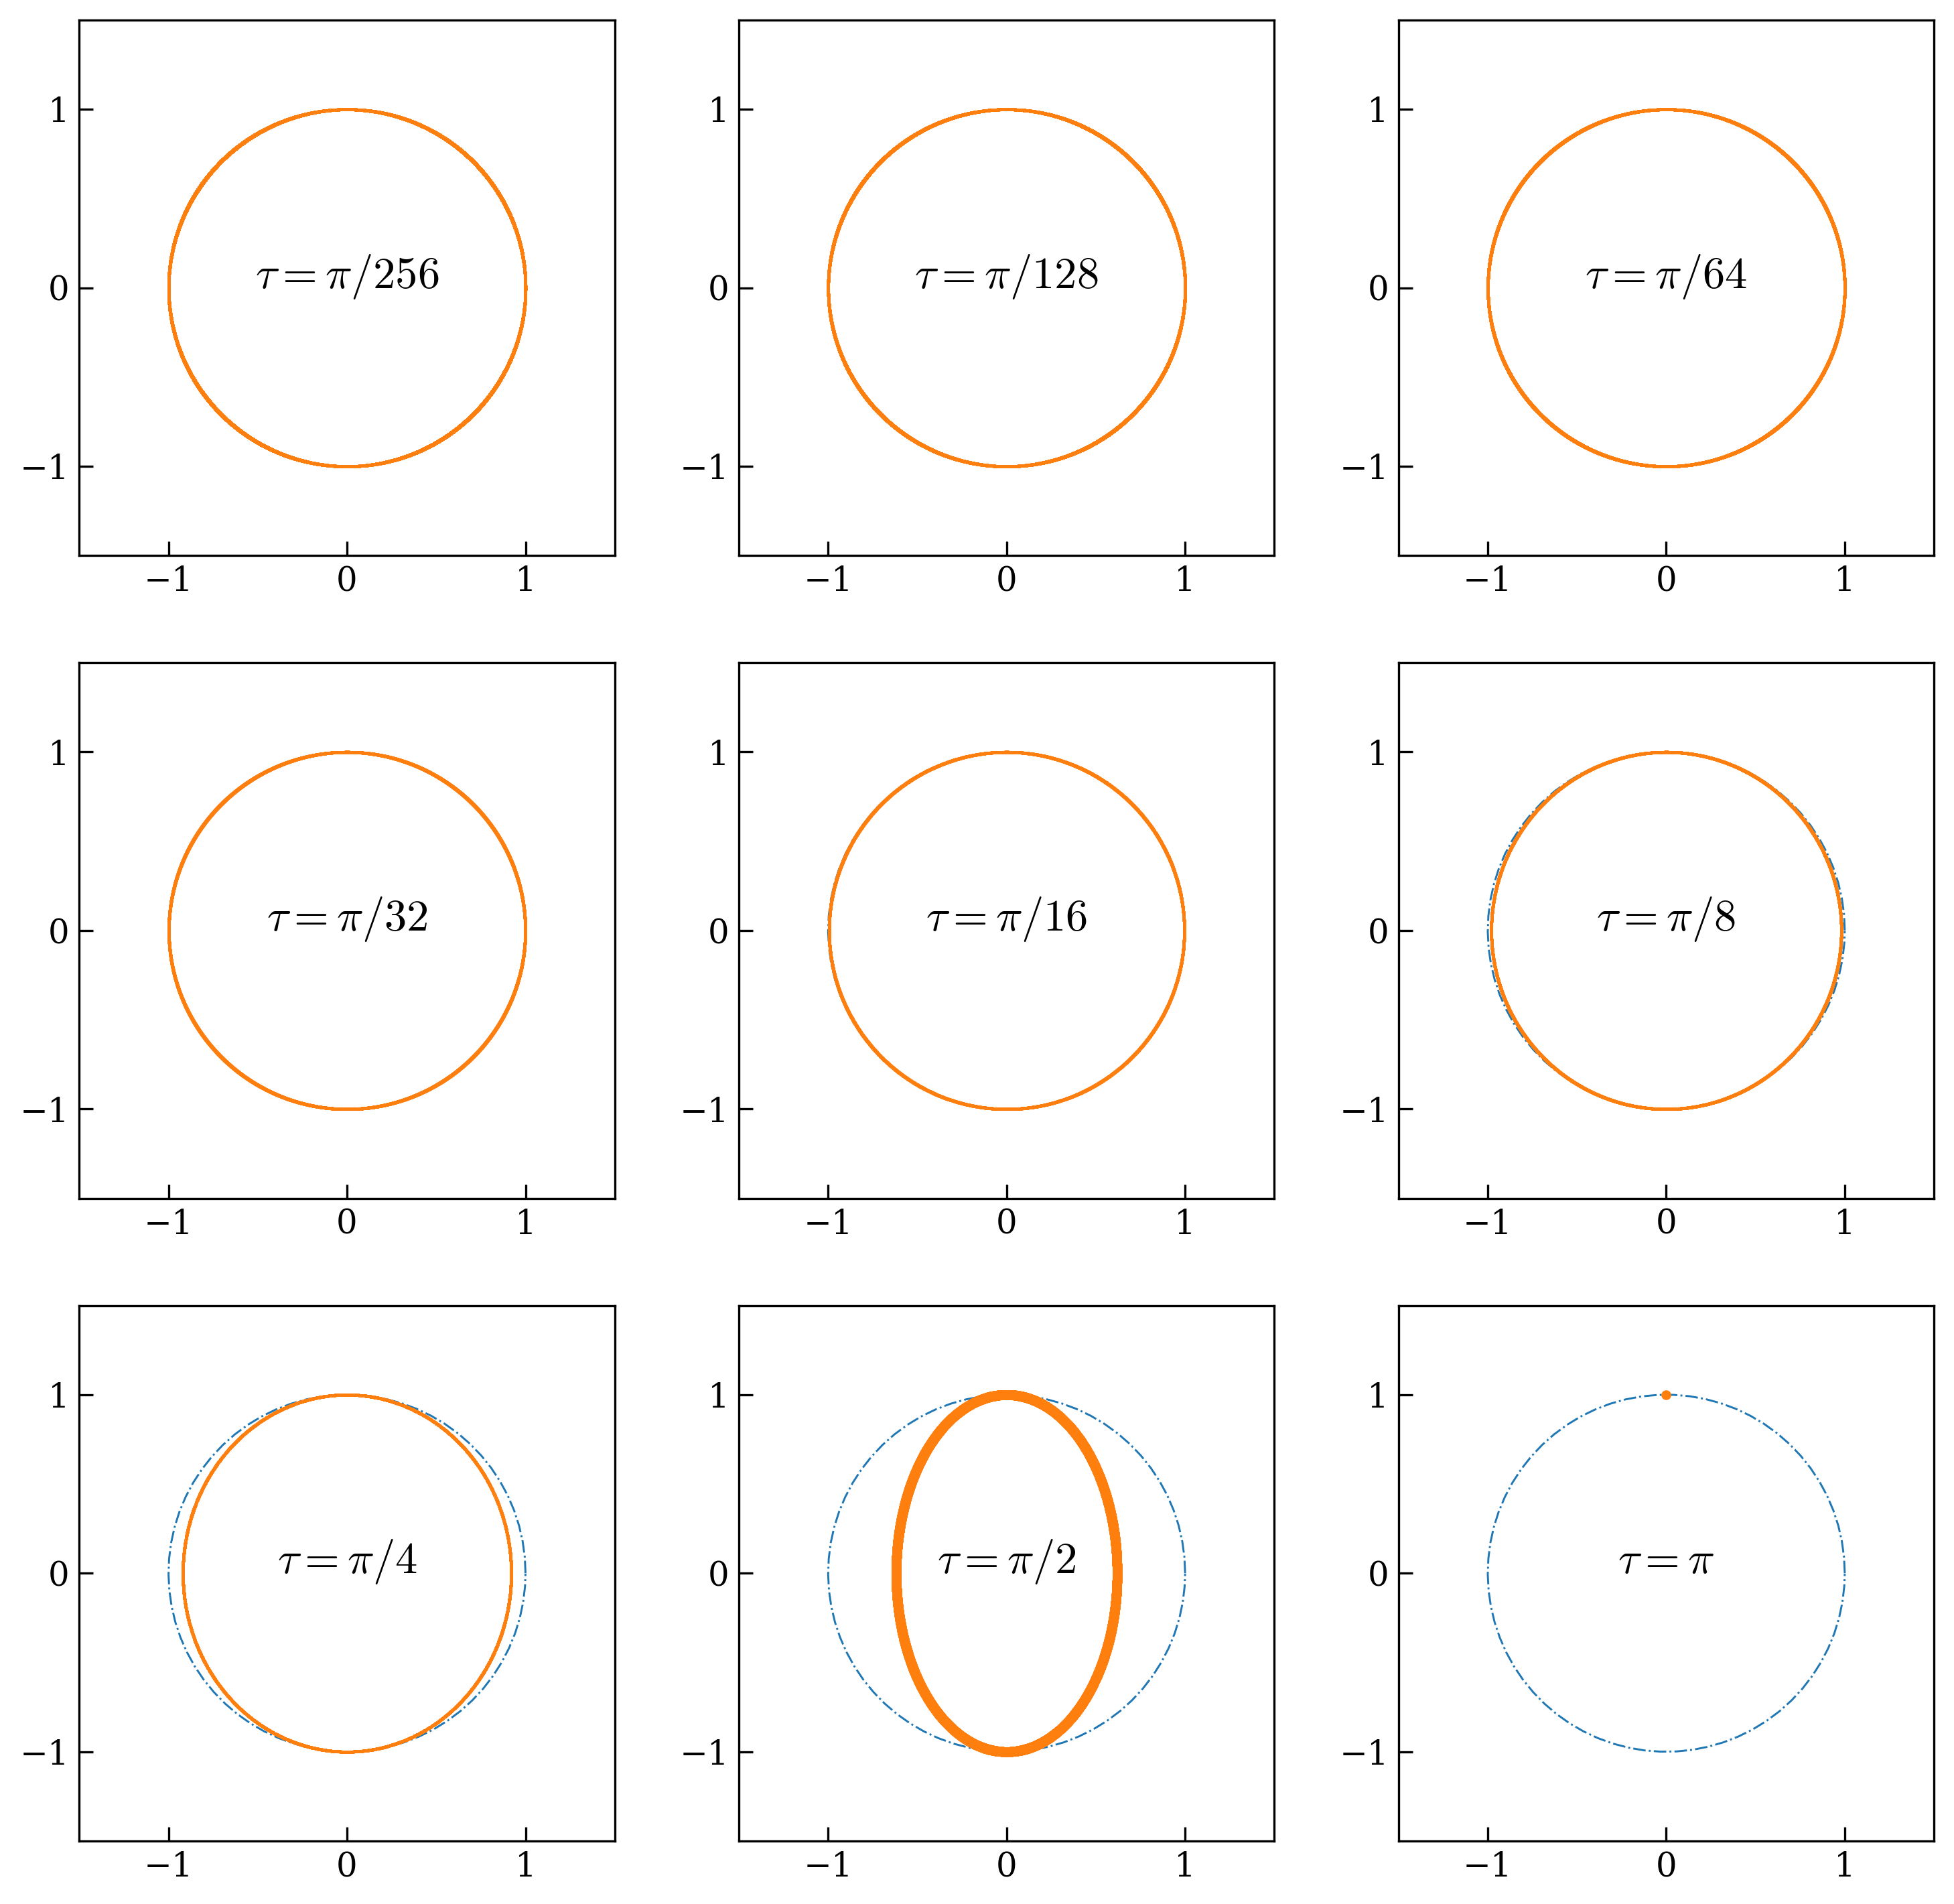

In [4]:
tf = 10000
p0, q0, s0 = 0, 0., 1.
epsilon = 0
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(12,12), dpi=300)
tspan0 = np.arange(0, 2*np.pi, 0.01)
for fact, spl in [(256,"331"),(128,"332"),(64,"333"),
                (32,"334"),(16,"335"),(8,"336"),
                (4,"337"),(2,"338"),(1,"339")]:
    tspan = np.arange(0, tf, np.pi/fact)
    plt.subplot(spl)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    #plt.title(f"$\\tau = \\pi/{fact}$")
    plt.text(0,0,
             f"$\\tau = \\pi/{fact}$" if fact>1 else "$\\tau = \\pi$"
             , horizontalalignment="center", rasterized=True)
    plt.plot(np.cos(tspan0),np.sin(tspan0),'-.',label="Exact",lw=0.7)
    plt.plot(sol[:,1],sols[:],'.',label="Numeric",ms=0.2 if fact > 2 else 5, rasterized=True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))
    plt.xticks([-1,0,1])
    plt.yticks([-1,0,1])
    #plt.legend(loc='upper right')

plt.savefig("e0.pdf")
plt.show()

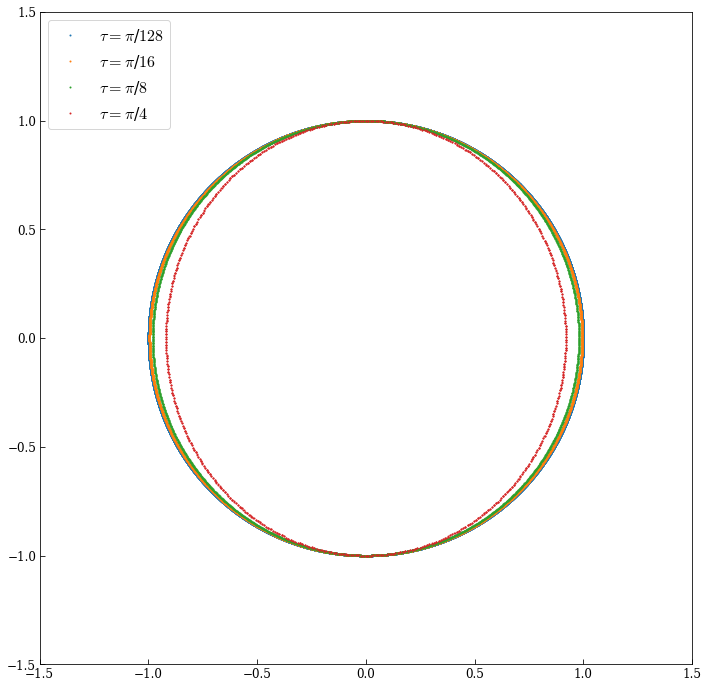

In [6]:
tf = 1000
p0, q0, s0 = 0, 0., 1.
epsilon = 0
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(12,12))

for fact in [128,16,8,4]:
    tspan = np.arange(0, tf, np.pi/fact)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    plt.plot(sol[:,1],sols,'.',
             label=r"$\tau = \pi $/" f"${fact}$",
             markersize=2)
    
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.legend(loc='upper left')
plt.show()

## Orbits $\epsilon \sim 1$

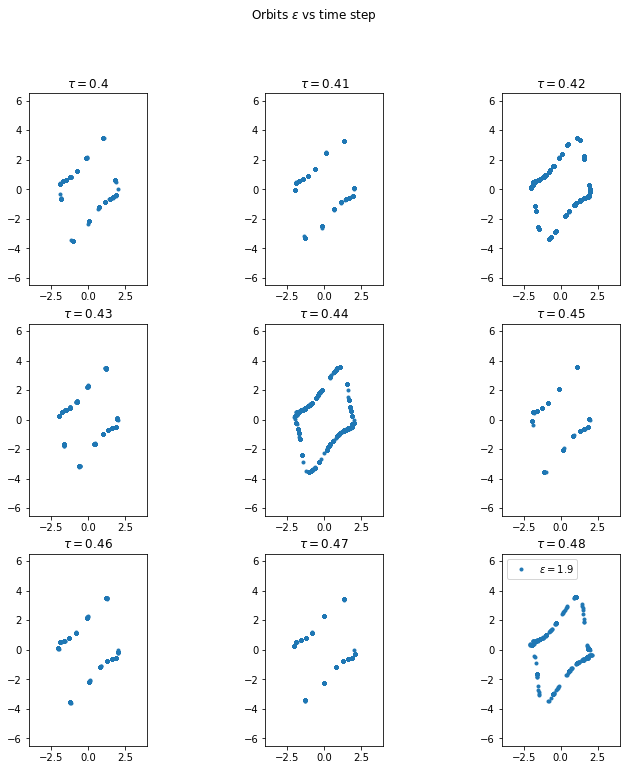

In [34]:
tf = 100000
p0, q0, s0 = 0, 2, 0
plt.figure(figsize=(12,12))
plt.suptitle(r"Orbits $\epsilon$ vs time step")
steps=[(0.4,"331"),(0.41,"332"),(0.42,"333"),
                (0.43,"334"),(0.44,"335"),(0.45,"336"),
                (0.46,"337"),(0.47,"338"),(0.48,"339")]
for fact, spl in steps:
    vdp = VanDerPol(1.5, 0, 0)
    tspan = np.arange(0, tf, fact)
    plt.subplot(spl)
    plt.gca().set_title(r"$\tau = " f"${fact}")
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    plt.plot(sol[:,1],sols,'.',
             label=r"$\epsilon = $" f"${epsilon}$")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim((-4,4))
    plt.ylim((-6.5,6.5))


plt.legend(loc='upper left')
plt.show()

/Users/mseri/code/VanDerPolContact/lienard/models.py:27: RuntimeWarning: overflow encountered in double_scalars
  return -epsilon*(1 - q**2)
/Users/mseri/code/VanDerPolContact/lienard/integrator.py:21: RuntimeWarning: overflow encountered in double_scalars
  p = (p + fq_q*s*dt)*ex
/Users/mseri/code/VanDerPolContact/lienard/integrator.py:21: RuntimeWarning: invalid value encountered in double_scalars
  p = (p + fq_q*s*dt)*ex
/Users/mseri/code/VanDerPolContact/lienard/integrator.py:8: RuntimeWarning: overflow encountered in double_scalars
  q += s*dt
/Users/mseri/code/VanDerPolContact/lienard/integrator.py:22: RuntimeWarning: invalid value encountered in double_scalars
  s *= ex
/Users/mseri/code/VanDerPolContact/lienard/integrator.py:20: RuntimeWarning: overflow encountered in double_scalars
  ex = np.exp(-dt*f_q)
/Users/mseri/code/VanDerPolContact/lienard/models.py:29: RuntimeWarning: overflow encountered in double_scalars
  return 2*epsilon*q


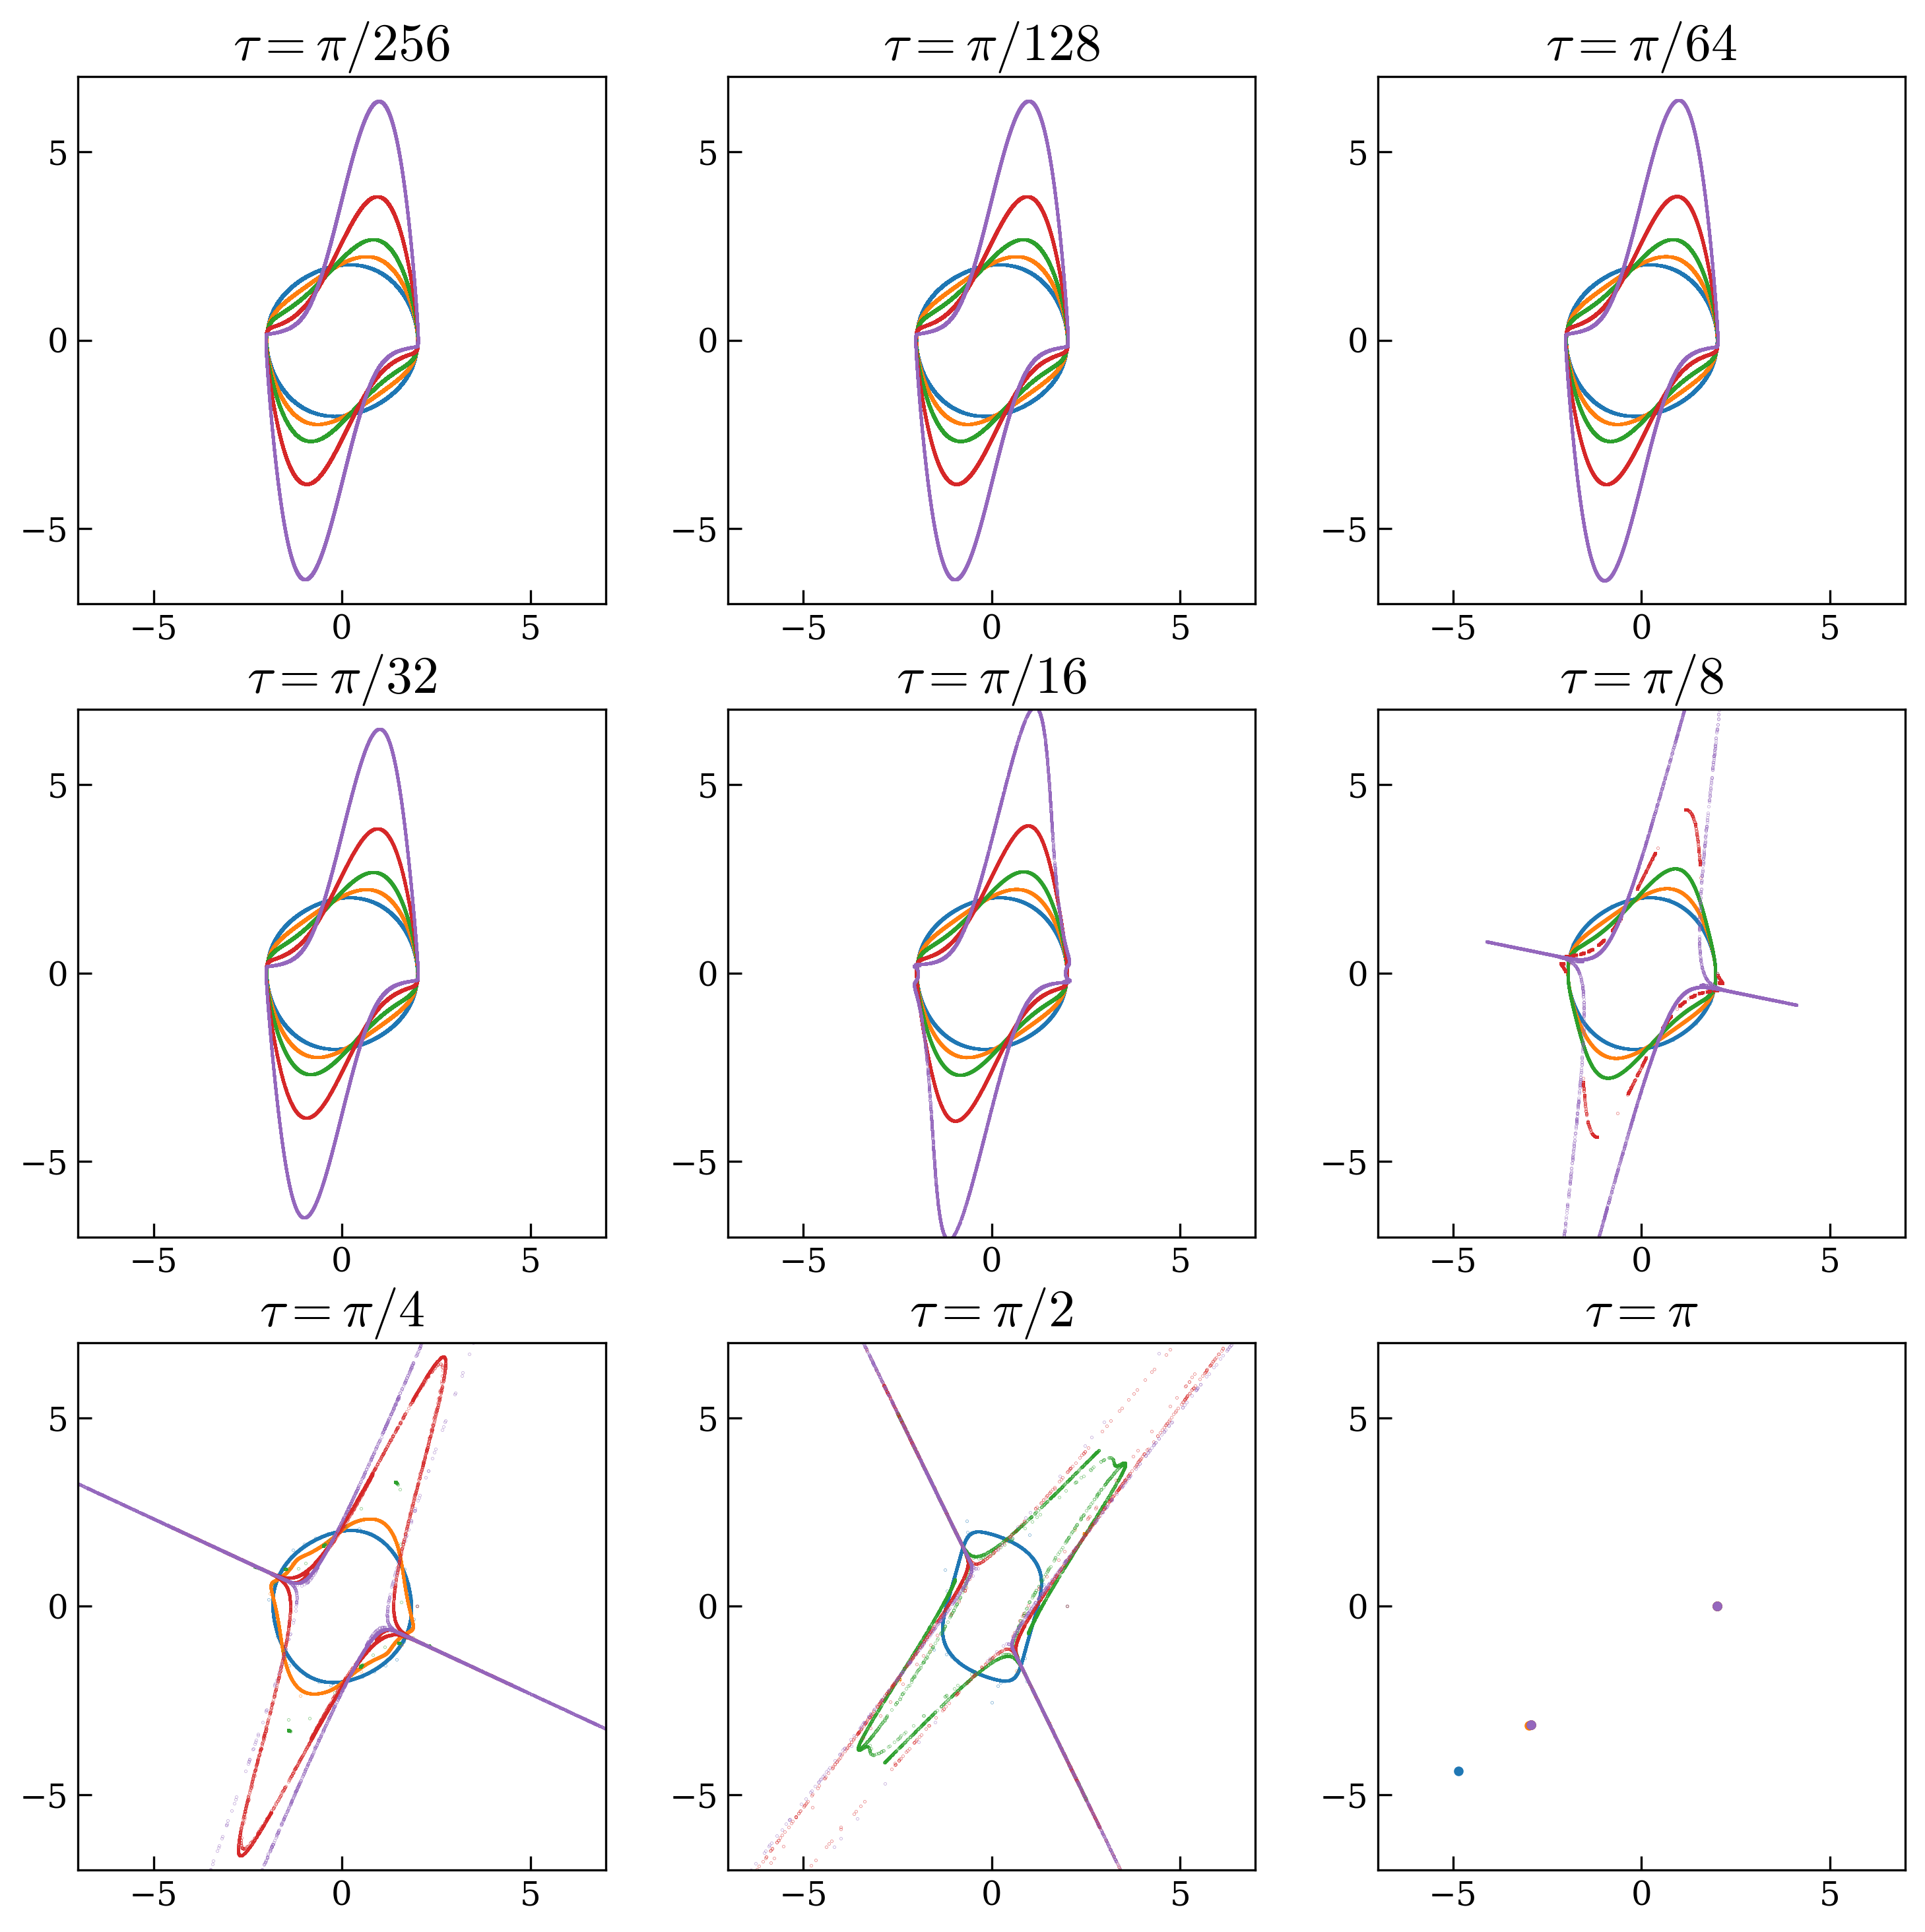

In [16]:
tf = 10000
p0, q0, s0 = 0, 2, 0

elist=[0.1,0.5,1,2,4]

steps = [
    (256,"331"),(128,"332"),(64,"333"),
    (32,"334"), (16,"335"), (8,"336"),
    (4,"337"),  (2,"338"),  (1,"339")
]

plt.figure(figsize=(12,12), dpi=300)

for fact, spl in steps:
    tspan = np.arange(0, tf, np.pi/fact)
    
    ax = plt.subplot(spl)
    ax.set_title(f"$\\tau = \\pi /{fact}$" if fact > 1 else "$\\tau = \\pi$")
    ax.set_xlim((-7,7))
    ax.set_xticks([-5,0,5])
    ax.set_ylim((-7,7))
    ax.set_yticks([-5,0,5])
    ax.set_aspect('equal', adjustable='box')
    
    for epsilon in elist:
        vdp = VanDerPol(epsilon, 0, 0)
        sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
        ax.plot(sol[:,1],sols,'.', ms=0.2 if fact > 1 else 5,
                 label=r"$\epsilon = {epsilon}$", rasterized=True)

#plt.legend(loc='upper left')
plt.savefig("differentepsilon.pdf")
plt.show()

## Orbits for $\epsilon \gg 1$

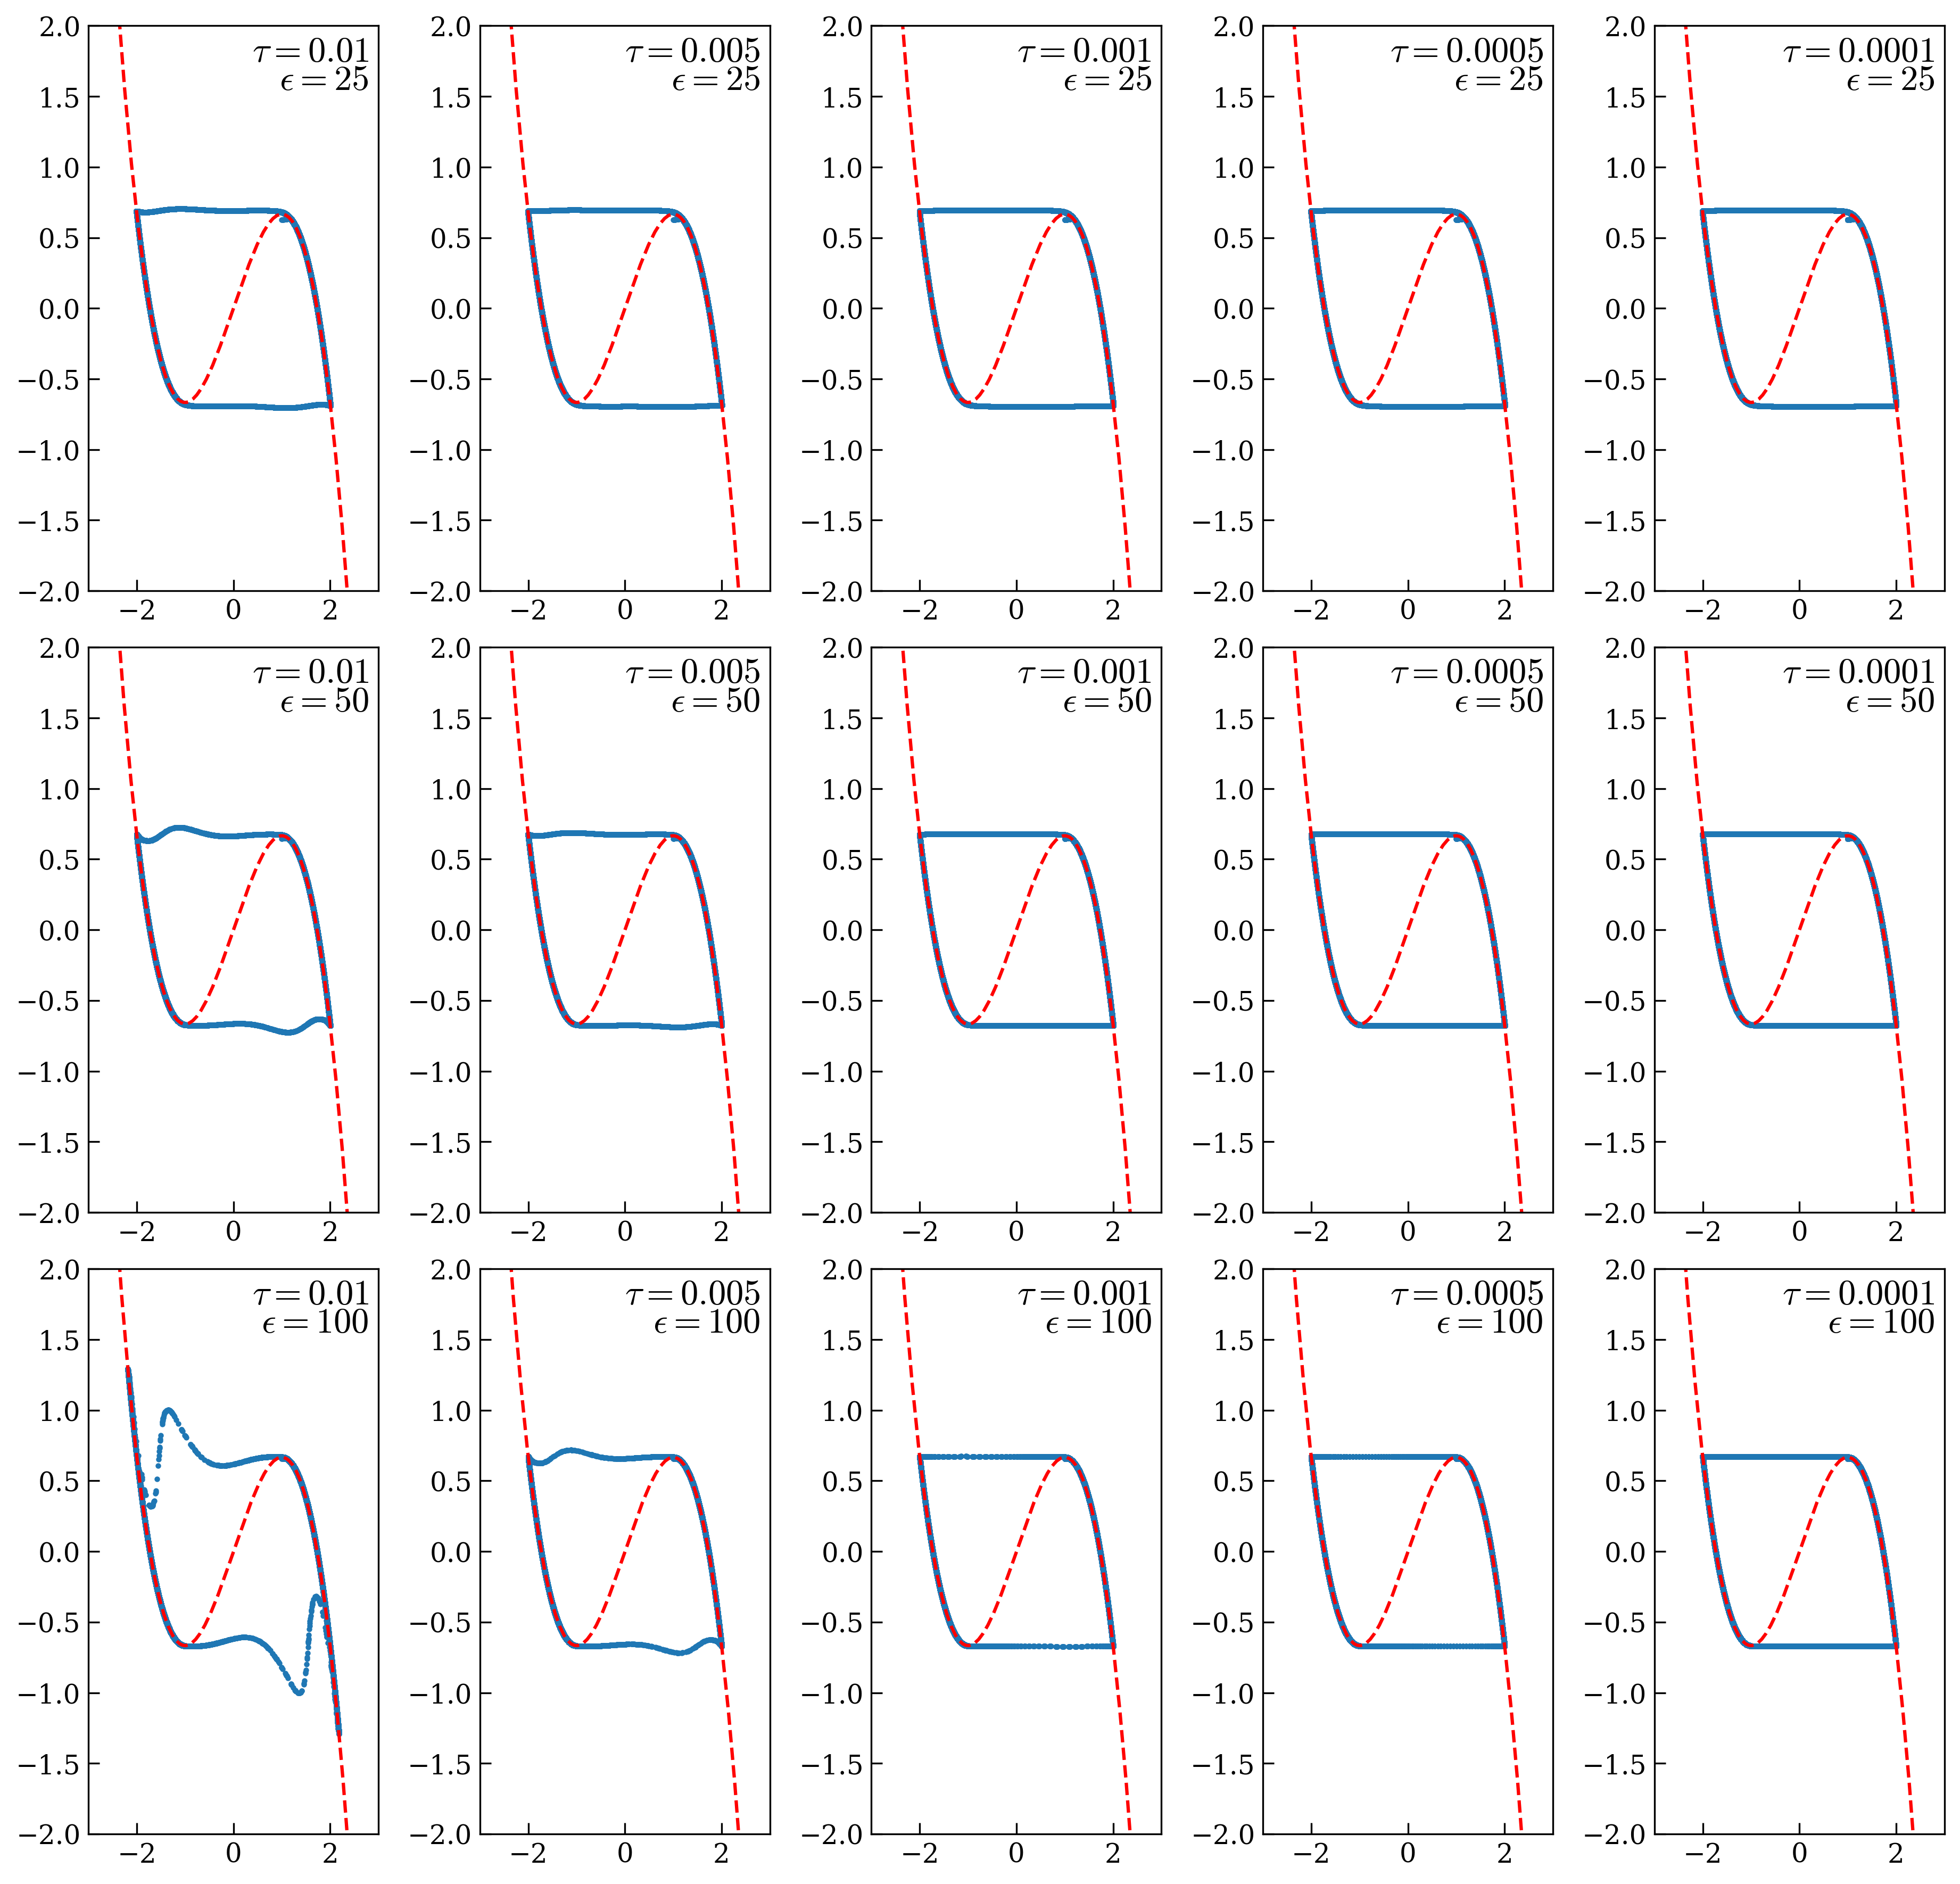

In [5]:
tf = 1000000 #10**7
p0, q0, s0 = -1., 1., 1.
r,c = 3,5

elist=[25,50,100]
x = np.arange(-3.5,3.5,0.01)

fig = plt.figure(figsize=(15,15), dpi=300)
plt.subplots_adjust(hspace=0.1, wspace=0.35)

for i,epsilon in enumerate(elist):
    vdp = VanDerPol(epsilon, 0, 0)

    for dt, spl in [
        (0.01,1),(0.005,2),(0.001,3),(0.0005,4),(0.0001,5)
    ]:
        tspan = np.arange(0, dt*(tf*10 if epsilon == 100 and spl == 5 else tf), dt)
        ax = fig.add_subplot(r,c, i*c + spl)
        ax.set_xlim(-3,3)
        ax.set_ylim(-2,2)
        ax.text(2.8,1.75,f"$\\tau = {dt}$",horizontalalignment="right")
        ax.text(2.8,1.55, f"$\epsilon={epsilon}$",horizontalalignment="right")
        
        sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
        ax.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/epsilon),
                 '.', markersize=3, rasterized=True)
        ax.plot(x, x-(1/3)*(x)**3,'r--', rasterized=True)

plt.savefig("orbits.pdf")
plt.show()